# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from microlensing.IPM.ipm import IPM
from microlensing.CCF.ccf import CCF

# Creating a magnification map

In [2]:
# calculating critical curves depends on the number of stars used
# we therefore set rectangular=True to avoid using a circular field with a larger number of stars
# we set approx=True to approximate the smooth deflection angle alpha_smooth with a Taylor series,
# as exact calculations involve transcendental functions for which we cannot guarantee all the
# critical curves have been located
 
ipm = IPM(verbose=1, 
          kappa_tot=0.4, shear=0.4, smooth_fraction=0.5, 
          rectangular=True, approx=True,
          half_length_y1=25, half_length_y2=25,
          num_pixels_y1=5000, num_pixels_y2=5000,
          write_stars=True) # we will also want to write the stars to disk

ipm.random_seed = 0 # setting to 0 will cause object to generate a random seed of its own
ipm.run()
ipm.save() # save stars to disk to use for finding caustics

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.061 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.063 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 3.627 seconds.

Done writing parameter info to file ./ipm_parameter_info.txt
Done writing star info to file ./ipm_stars.bin


# Locating critical curves and caustics

In [3]:
ccf = CCF(verbose=1, 
          kappa_tot=ipm.kappa_tot, shear=ipm.shear, 
          starfile=f'{ipm.outfile_prefix}ipm_stars.bin',
          num_phi=200, # number of steps for the phase parameter phi that traces the critical curves
          write_caustics=True) # by default only critical curves are calculated, so set true to map them to caustics as well

In [4]:
ccf.run()

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.061 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.065 seconds.

Finding initial roots...
[==================================================] 100 %
Done finding initial roots. Elapsed time: 0.156 seconds.
Maximum error in 1/mu: 2.15642e-09

Finding critical curve positions...
[==================================================] 100 %
Done finding critical curve positions. Elapsed time: 2.643 seconds.
Maximum error in 1/mu: 4.71941e-09



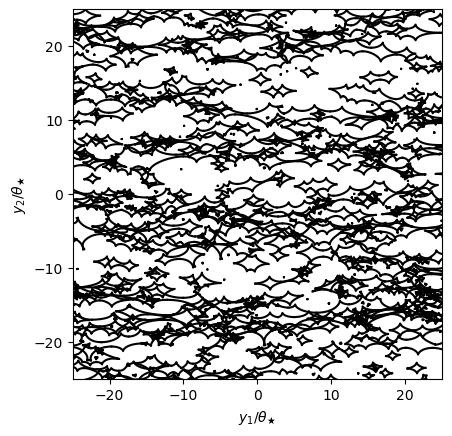

In [5]:
# plot the locations of the caustics
fig, ax = plt.subplots()
ccf.plot_caustics(ax, color='black')
ax.set_xlim([-ipm.half_length[0], ipm.half_length[0]])
ax.set_ylim([-ipm.half_length[1], ipm.half_length[1]])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()

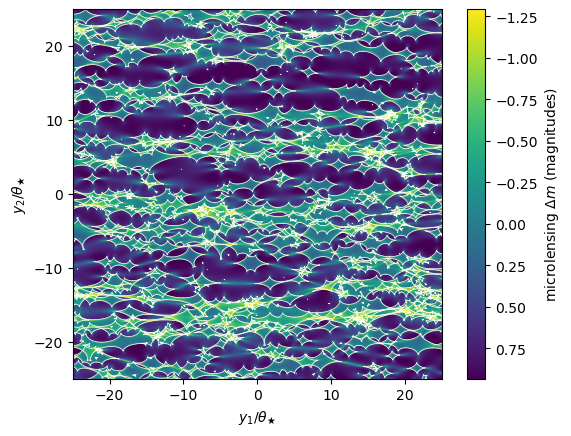

In [6]:
# overlay the locations of the caustics on top of the magnification map
fig, ax = plt.subplots()
ipm.plot(ax)
ccf.plot_caustics(ax, c='white', lw=0.5)
ax.set_xlim([-ipm.half_length[0], ipm.half_length[0]])
ax.set_ylim([-ipm.half_length[1], ipm.half_length[1]])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()

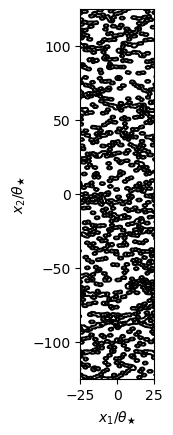

In [7]:
# plot the locations of the critical curves
fig, ax = plt.subplots()
ccf.plot_critical_curves(ax)
ax.set_xlim([-ipm.half_length[0] / np.abs(1 - ipm.kappa_tot + ipm.shear), 
             ipm.half_length[0] / np.abs(1 - ipm.kappa_tot + ipm.shear)])
ax.set_ylim([-ipm.half_length[1] / np.abs(1 - ipm.kappa_tot - ipm.shear), 
             ipm.half_length[1] / np.abs(1 - ipm.kappa_tot - ipm.shear)])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()